# Raspberry Pi camera

## Capture an image

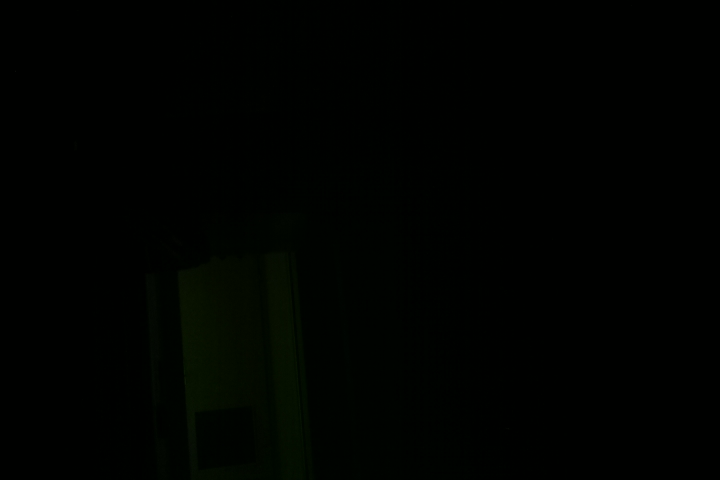

In [5]:
# capture images
import time
import picamera

with picamera.PiCamera() as camera:
    camera.start_preview()
    time.sleep(2)
    camera.capture('foo.jpg')
    camera.stop_preview()
    
# preview
from IPython.display import Image
Image(filename='foo.jpg') 

## Image in a dark

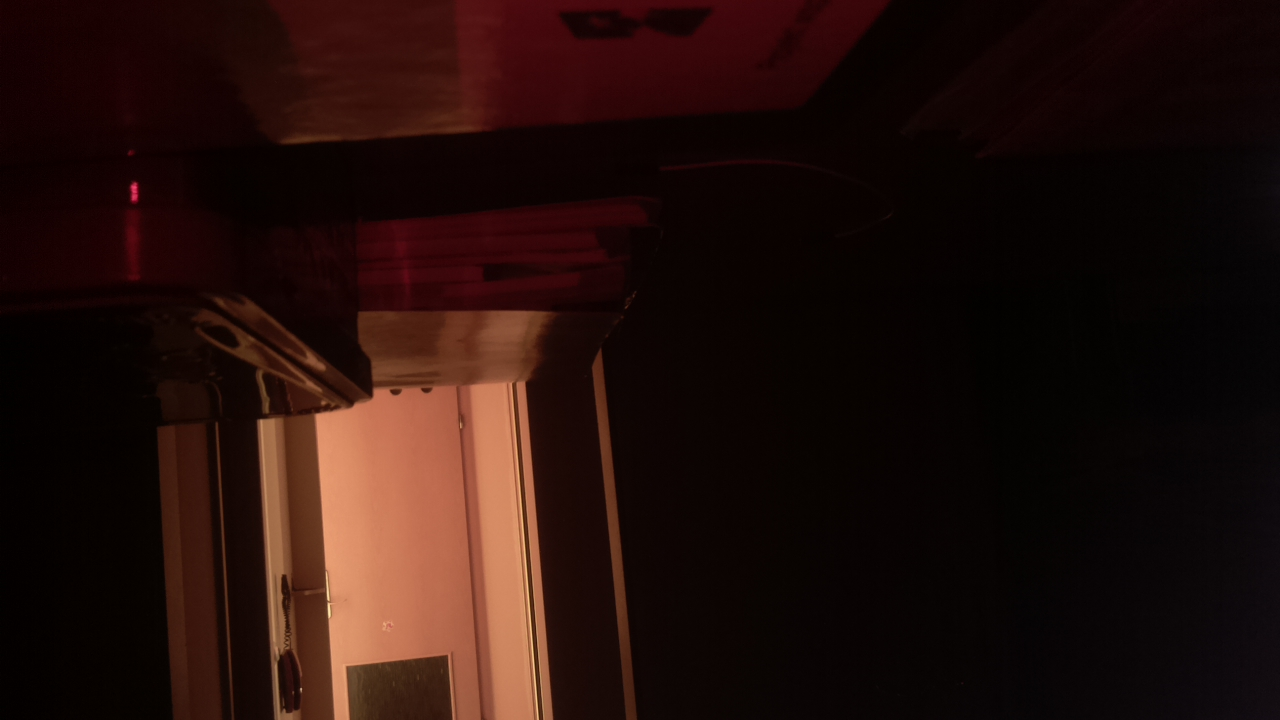

In [6]:
# image in dark
import picamera
from time import sleep
from fractions import Fraction

with picamera.PiCamera() as camera:
    camera.resolution = (1280, 720)
    # Set a framerate of 1/6fps, then set shutter
    # speed to 6s and ISO to 800
    camera.framerate = Fraction(1, 6)
    camera.shutter_speed = 6000000
    camera.exposure_mode = 'off'
    camera.iso = 800
    # Give the camera a good long time to measure AWB
    # (you may wish to use fixed AWB instead)
    sleep(10)
    # Finally, capture an image with a 6s exposure. Due
    # to mode switching on the still port, this will take
    # longer than 6 seconds
    camera.capture('dark.jpg')
    
from IPython.display import Image
Image(filename='dark.jpg') 

## Record a video

```# install MP4Box program
apt-get install gpac```

In [7]:
import os
import picamera

os.unlink('my_video.mp4')
os.unlink('my_video.h264')

with picamera.PiCamera() as camera:
    camera.resolution = (640, 480)
    camera.start_recording('my_video.h264')
    camera.wait_recording(20)
    camera.stop_recording()
    
from subprocess import check_call
check_call("MP4Box -fps 30 -add my_video.h264 my_video.mp4", shell=True)

from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="files/my_video.mp4" type="video/mp4">
</video>
""")

## Hihg speed video

In [8]:
import os
import picamera

os.unlink('my_video.mp4')
os.unlink('my_video.h264')

with picamera.PiCamera() as camera:
    camera.resolution = (640, 480)
    camera.fps = 90
    camera.start_recording('my_video.h264')
    camera.wait_recording(20)
    camera.stop_recording()
    
from subprocess import check_call
check_call("MP4Box -fps 30 -add my_video.h264 my_video.mp4", shell=True)

from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="files/my_video.mp4" type="video/mp4">
</video>
""")